## Basic Regression using Tensorfow

In this notebook, I will be working on a basic regression task using some artificial data.

### Creating Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1 Million Points
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
# y = mx + b + noise_levels
b = 5

y_true =  (0.5 * x_data ) + 5 + noise

In [5]:
data_df = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)

In [6]:
data_df.head()

,X Data,Y
0,0.00000,3.888067
1,0.00001,5.585004
2,0.00002,4.746588
3,0.00003,4.093289
4,0.00004,4.829666


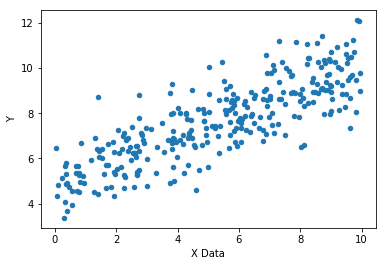

In [7]:
data_df.sample(n=300).plot(kind='scatter',x='X Data',y='Y')

### Defining Tensoflow Model

In [8]:
import tensorflow as tf

#### Batch size 

In [9]:
batch_size = 10

#### Variables 

In [10]:
print(np.random.randn(2))

[2.10018606 1.80689793]


In [12]:
m = tf.Variable(2.10018606)    # Randomly initializing weights and biases, here these are nothing but slope and intercept. 
b = tf.Variable(1.80689793)

#### Placeholders 

In [13]:
X_train = tf.placeholder(tf.float32,[batch_size])
y_train = tf.placeholder(tf.float32,[batch_size])

#### Graph

In [14]:
y = m*X_train + b

#### Loss Function 

In [15]:
error = tf.reduce_sum(tf.square(y_train-y))

#### Optimizer 

In [16]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

#### Initialize Variables

In [17]:
init = tf.global_variables_initializer()

#### Session 

In [18]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {X_train:x_data[rand_ind],y_train:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    slope,intercept = sess.run([m,b])

In [19]:
slope

0.50642943

In [20]:
intercept

4.9609194

### Result

In [21]:
y_pred = x_data * slope + intercept

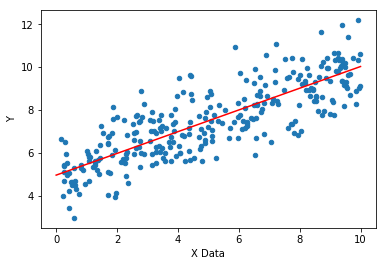

In [23]:
data_df.sample(n=300).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_pred,'r')